In [1]:
import numpy as np
import pandas as pd
import scipy
import math
import warnings
import seaborn.objects as so
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2', font_scale=1.3)

In [2]:
EXPERIMENTS = 1000
SAMPLE_SIZE = 50
metrics = np.zeros((3, EXPERIMENTS))

rng = np.random.default_rng()
n, p = 1000, .5  # number of trials, probability of each trial

for i in range(metrics.shape[1]):
    x = rng.binomial(n, p, SAMPLE_SIZE)
    metrics[:, i] = [x.mean(), x.var(), np.quantile(x, 0.5)]

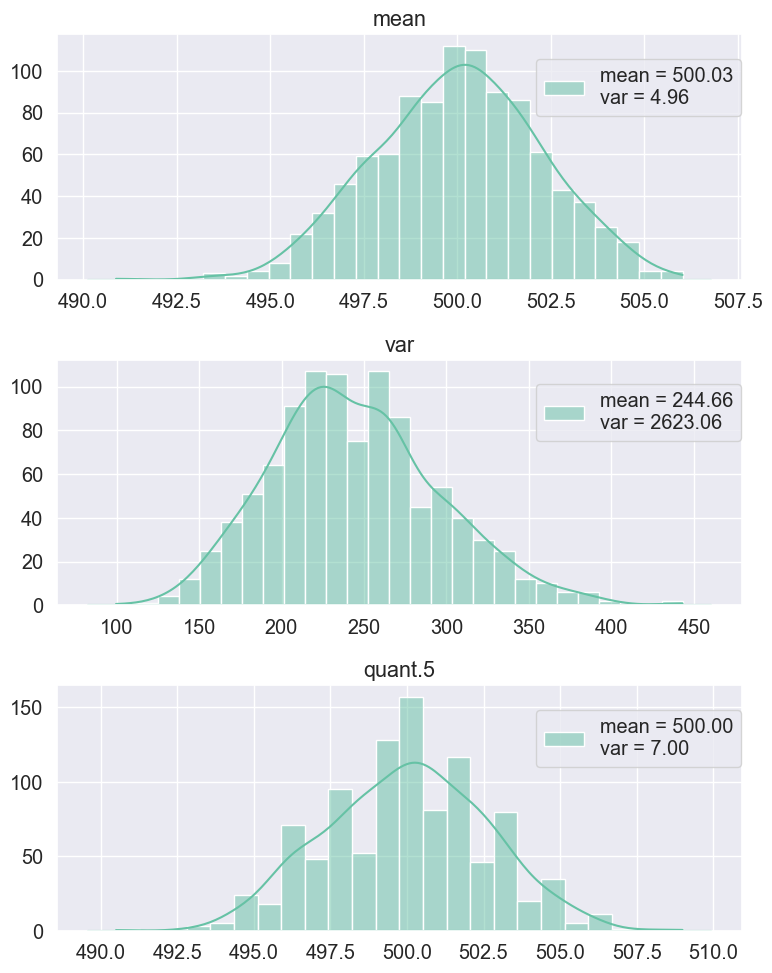

In [3]:
with warnings.catch_warnings(record=True):
    fig = plt.figure(figsize=(8, 10))
    axs = fig.subplots(3)
    for i, name in enumerate(['mean', 'var', 'quant.5']):
        mean = metrics[i].mean()
        var = metrics[i].var()
        sns.histplot(metrics[i], ax=axs[i], kde=True,
                        label="mean = {:.2f}\nvar = {:.2f}".format(mean, var))
        x0, x1 = axs[i].get_xlim()
        x_pdf = np.linspace(x0, x1, 100)
        y_pdf = scipy.stats.norm.pdf(x_pdf)
        sns.lineplot(x=x_pdf, y=y_pdf, ax=axs[i])
        axs[i].set_ylabel("")
        axs[i].set_title(name)
        axs[i].legend()
        axs[i].legend(bbox_to_anchor=(0.7, 0.9), loc='upper left', borderaxespad=0)
        
    
    fig.tight_layout()

In [4]:
x = rng.gamma(2, 1, SAMPLE_SIZE)
x

array([4.18708743, 3.51822704, 1.3821541 , 2.78161531, 1.40088734,
       4.35155476, 1.22797866, 1.38537686, 1.04491126, 0.88019518,
       0.94919533, 1.6791387 , 1.78477111, 3.11830187, 0.89636452,
       2.67725489, 3.03095777, 3.12413473, 6.43083304, 4.57774929,
       1.410702  , 0.62256583, 0.97895182, 1.46641198, 0.40448727,
       2.31368886, 0.68283413, 0.42855495, 5.72113022, 1.29428341,
       5.31922921, 1.63190645, 1.22333931, 2.08974438, 2.78310223,
       2.92743313, 6.98022661, 3.16748774, 1.31138245, 0.45706995,
       0.42800986, 0.70065333, 1.47357833, 0.86524771, 1.37302474,
       3.28521905, 1.31843719, 1.78861348, 5.08179519, 1.61259091])

In [5]:
EXPERIMENTS = 10000
SAMPLE_SIZE = 10000
metrics = np.zeros((3, EXPERIMENTS))

rng = np.random.default_rng()
n, p = 1000, .5  # number of trials, probability of each trial

# x1 = rng.binomial(n, p, SAMPLE_SIZE)
# xcdf = scipy.stats.binom.cdf(x1, n=n, p=p)
# xcdf

In [13]:


for i in range(metrics.shape[1]):
    x = rng.binomial(n, p, SAMPLE_SIZE)
    xcdf = scipy.stats.ecdf(x).cdf
    # print(x)
    def kth_order_statistic(arr, k):
        return np.partition(np.asarray(arr), k)[k]
    metrics[:, i] = [kth_order_statistic(x, 1), SAMPLE_SIZE * xcdf.evaluate(kth_order_statistic(x, 1)), -1]

metrics

array([[445., 444., 445., ..., 439., 440., 442.],
       [  2.,   2.,   3., ...,   2.,   2.,   4.],
       [ -1.,  -1.,  -1., ...,  -1.,  -1.,  -1.]])

In [14]:
m2 = np.rot90(metrics)

/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

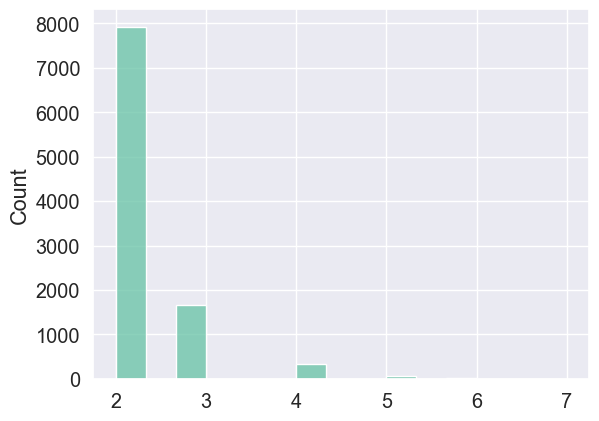

In [15]:
sns.histplot(x=metrics[1,:])

/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

<Axes: >

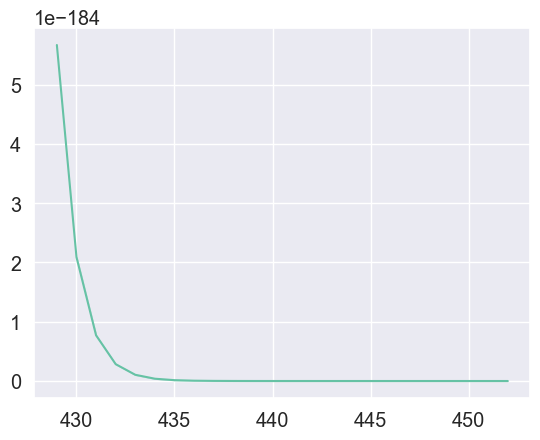

In [16]:
y1 = scipy.stats.gamma.pdf(metrics[0,:], 2, 1)
sns.lineplot(x=metrics[0,:], y=y1)

/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

<Axes: >

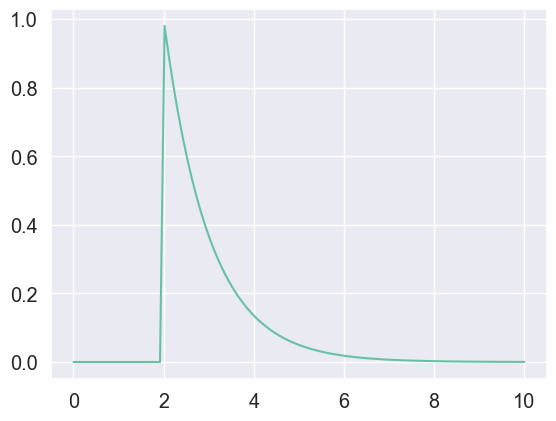

In [10]:
x = np.linspace(0, 10, 100)
y2 = scipy.stats.gamma.pdf(x, 1, 2)
sns.lineplot(x=x, y=y2)

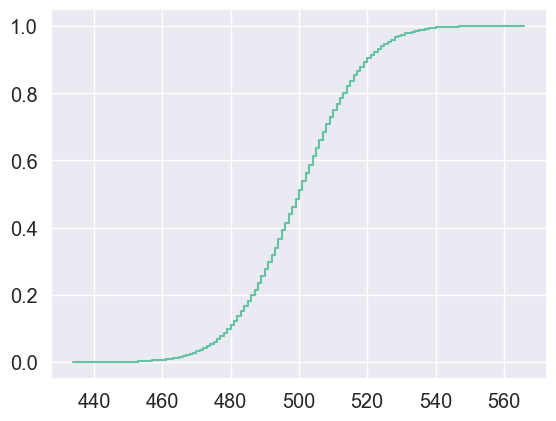

In [11]:
x = rng.binomial(n, p, SAMPLE_SIZE)
x.size
xcdf = scipy.stats.ecdf(x).cdf
xcdf.plot()


In [28]:
[scipy.stats.moment(x, 2), xcdf.evaluate(scipy.stats.moment(x, 2)), -1]

[234.00590000000003, array(0.), -1]

In [19]:


for i in range(metrics.shape[1]):
    x = rng.binomial(n, p, SAMPLE_SIZE)
    xcdf = scipy.stats.ecdf(x).cdf
    # print(x)
    def kth_order_statistic(arr, k):
        return np.partition(np.asarray(arr), k)[k]
    metrics[:, i] = [kth_order_statistic(x, SAMPLE_SIZE - 1), SAMPLE_SIZE * (1 - xcdf.evaluate(kth_order_statistic(x, SAMPLE_SIZE - 1) - .00001)), -1]

metrics

array([[563., 553., 555., ..., 555., 562., 557.],
       [  1.,   1.,   2., ...,   1.,   1.,   1.],
       [ -1.,  -1.,  -1., ...,  -1.,  -1.,  -1.]])

/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

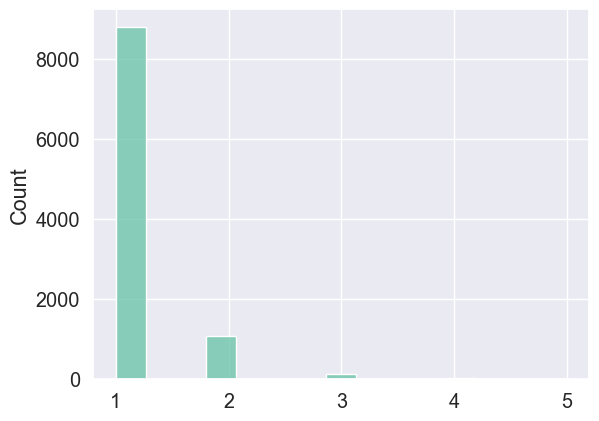

In [20]:
sns.histplot(x=metrics[1,:])  

/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/prohtocol/.pyenv/versions/3.11.4/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

<Axes: >

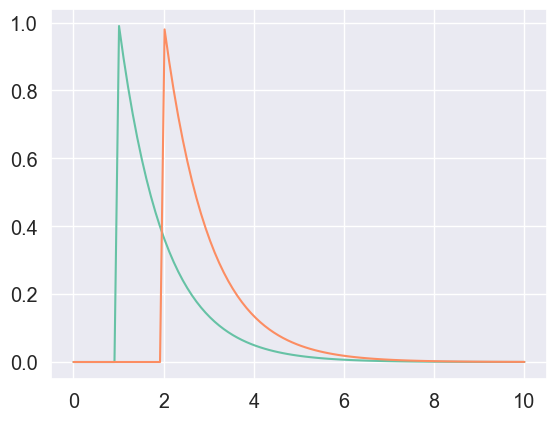

In [105]:
x = np.linspace(0, 10, 100)
ax = plt.gca()
y2 = scipy.stats.gamma.pdf(x, 1, 1)
y3 = scipy.stats.gamma.pdf(x, 1, 2)
sns.lineplot(x=x, y=y2, ax=ax)
sns.lineplot(x=x, y=y3, ax=ax)